In [93]:
import json
import sys
from collections import defaultdict
from datetime import datetime

import requests
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from marketAPI import AlphaVantage

%matplotlib inline

import pickle

In [94]:
av = AlphaVantage()

In [87]:
# sp500 = (
#     pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]
#     .Symbol
#     .tolist()
# )

In [67]:
# with open('sp500_tickers.pkl', 'wb') as pkl:
#     pickle.dump(sp500, pkl)

In [95]:
with open('sp500_tickers.pkl', 'rb') as pkl:
    sp500 = pickle.load(pkl)

In [96]:
symbol = "TSLA"
interval = '15min'

In [97]:
def statCheck(symbol, freq='daily', size="full"):
    if freq == 'daily':
        interval = 'Daily'
        stock_price = av.dailyAdjStock(symbol, size=size)
    else:
        interval = '5min'
        stock_price = av.intradayStock(symbol, interval=interval)
    stockSeries = stock_price[f'Time Series ({interval})']
    
    stockSMA50 = av.stockSMA(symbol, interval, '50')
    stockSMA200 = av.stockSMA(symbol, interval, '200')
    
    timeSeries = defaultdict(dict)
    for k, v in stockSeries.items():
        date_key = datetime.strptime(k, "%Y-%m-%d %H:%M:%S")
        timeSeries[date_key]['close'] = v['4. close']
        timeSeries[date_key]['volume'] = v['5. volume']

    for k, v in stockSMA50['Technical Analysis: SMA'].items():
        date_key = datetime.strptime(k, "%Y-%m-%d %H:%M")
        timeSeries[date_key]['SMA50'] = v['SMA']

    for k, v in stockSMA200['Technical Analysis: SMA'].items():
        date_key = datetime.strptime(k, "%Y-%m-%d %H:%M")
        timeSeries[date_key]['SMA200'] = v['SMA']
        
    return timeSeries

In [101]:
av.stockSMA(symbol, 'daily', '200')

{'Meta Data': {'1: Symbol': 'TSLA',
  '2: Indicator': 'Simple Moving Average (SMA)',
  '3: Last Refreshed': '2020-07-16',
  '4: Interval': 'daily',
  '5: Time Period': 200,
  '6: Series Type': 'close',
  '7: Time Zone': 'US/Eastern'},
 'Technical Analysis: SMA': {'2020-07-16': {'SMA': '629.7718'},
  '2020-07-15': {'SMA': '623.4730'},
  '2020-07-14': {'SMA': '616.9536'},
  '2020-07-13': {'SMA': '610.5824'},
  '2020-07-10': {'SMA': '604.2406'},
  '2020-07-09': {'SMA': '597.6334'},
  '2020-07-08': {'SMA': '591.8681'},
  '2020-07-07': {'SMA': '586.2418'},
  '2020-07-06': {'SMA': '580.5255'},
  '2020-07-02': {'SMA': '574.8851'},
  '2020-07-01': {'SMA': '570.0657'},
  '2020-06-30': {'SMA': '565.6816'},
  '2020-06-29': {'SMA': '561.5086'},
  '2020-06-26': {'SMA': '557.6912'},
  '2020-06-25': {'SMA': '554.1280'},
  '2020-06-24': {'SMA': '550.3758'},
  '2020-06-23': {'SMA': '546.7305'},
  '2020-06-22': {'SMA': '542.8588'},
  '2020-06-19': {'SMA': '539.0351'},
  '2020-06-18': {'SMA': '535.1340'}

In [99]:
av.intradayStock('TSLA')

{'Meta Data': {'1. Information': 'Intraday (15min) open, high, low, close prices and volume',
  '2. Symbol': 'TSLA',
  '3. Last Refreshed': '2020-07-15 20:00:00',
  '4. Interval': '15min',
  '5. Output Size': 'Compact',
  '6. Time Zone': 'US/Eastern'},
 'Time Series (15min)': {'2020-07-15 20:00:00': {'1. open': '1509.5000',
   '2. high': '1513.0000',
   '3. low': '1509.5000',
   '4. close': '1511.0000',
   '5. volume': '15022'},
  '2020-07-15 19:45:00': {'1. open': '1509.9900',
   '2. high': '1511.0000',
   '3. low': '1508.0000',
   '4. close': '1511.0000',
   '5. volume': '8865'},
  '2020-07-15 19:30:00': {'1. open': '1508.5000',
   '2. high': '1510.9000',
   '3. low': '1505.0000',
   '4. close': '1510.0000',
   '5. volume': '11445'},
  '2020-07-15 19:15:00': {'1. open': '1511.0000',
   '2. high': '1512.0000',
   '3. low': '1508.9800',
   '4. close': '1508.9800',
   '5. volume': '14792'},
  '2020-07-15 19:00:00': {'1. open': '1520.0200',
   '2. high': '1520.0200',
   '3. low': '1507.2

In [98]:
av.dailyAdjStock('TSLA', size='full')

{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events',
  '2. Symbol': 'TSLA',
  '3. Last Refreshed': '2020-07-16',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2020-07-16': {'1. open': '1477.1600',
   '2. high': '1531.7100',
   '3. low': '1466.0000',
   '4. close': '1500.6400',
   '5. adjusted close': '1500.6400',
   '6. volume': '14098600',
   '7. dividend amount': '0.0000',
   '8. split coefficient': '1.0000'},
  '2020-07-15': {'1. open': '1543.0000',
   '2. high': '1550.0000',
   '3. low': '1457.0000',
   '4. close': '1546.0100',
   '5. adjusted close': '1546.0100',
   '6. volume': '16368700',
   '7. dividend amount': '0.0000',
   '8. split coefficient': '1.0000'},
  '2020-07-14': {'1. open': '1556.0000',
   '2. high': '1590.0000',
   '3. low': '1431.0000',
   '4. close': '1516.8000',
   '5. adjusted close': '1516.8000',
   '6. volume': '23428100',
   '7. dividend amount': '0.0000',
   '8. split coefficien

In [79]:
priorDict = {
    "TSLA": {
        "SMA50": 1300,
        "SMA200": 1200,
        "50over200": True
    },
    "MMM": {
        "SMA50": 500,
        "SMA200": 600,
        "50over200": False
    },
    
    
}

In [81]:
currentDict = {
    "TSLA": {
        "SMA50": 1300,
        "SMA200": 1200,
        "price": 1320
    },
    "MMM": {
        "SMA50": 500,
        "SMA200": 450,
        "price": 550
    },
}

In [82]:
def check50Over200Change(symbol, currentDict, priorDict):
    symDict = currentDict.get(symbol)
    isOver = symDict['SMA50'] > symDict['SMA200']
    wasOver = priorDict[symbol]['50over200']

    if isOver != wasOver:
        if isOver is True:
            return 'gold'
        else:
            return 'death'
    
    return None


In [84]:

def globalSymbolCheck(av, symList):

    for sym in symList:
        av.stockSMA(symbol: str, interval="5min", time_period="50", series_type="close"
    ):
        

'gold'

In [74]:
intraStock = av.intradayStock(symbol, interval)

JSONDecodeError, returning raw


In [29]:
stockSMA50 = av.stockSMA(symbol, interval, '50')
stockSMA200 = av.stockSMA(symbol, interval, '200')

In [32]:
stockSMA200['Technical Analysis: SMA']

{'2020-07-08 20:00': {'SMA': '1360.7231'},
 '2020-07-08 19:45': {'SMA': '1360.0023'},
 '2020-07-08 19:30': {'SMA': '1359.2382'},
 '2020-07-08 19:15': {'SMA': '1358.4582'},
 '2020-07-08 19:00': {'SMA': '1357.6462'},
 '2020-07-08 18:45': {'SMA': '1356.8138'},
 '2020-07-08 18:30': {'SMA': '1355.9722'},
 '2020-07-08 18:15': {'SMA': '1355.1319'},
 '2020-07-08 18:00': {'SMA': '1354.2950'},
 '2020-07-08 17:45': {'SMA': '1353.4752'},
 '2020-07-08 17:30': {'SMA': '1352.6319'},
 '2020-07-08 17:15': {'SMA': '1351.8311'},
 '2020-07-08 17:00': {'SMA': '1351.0369'},
 '2020-07-08 16:45': {'SMA': '1350.2310'},
 '2020-07-08 16:30': {'SMA': '1349.4181'},
 '2020-07-08 16:15': {'SMA': '1348.6153'},
 '2020-07-08 16:00': {'SMA': '1347.8254'},
 '2020-07-08 15:45': {'SMA': '1347.0042'},
 '2020-07-08 15:30': {'SMA': '1346.2288'},
 '2020-07-08 15:15': {'SMA': '1345.4578'},
 '2020-07-08 15:00': {'SMA': '1344.7670'},
 '2020-07-08 14:45': {'SMA': '1344.1101'},
 '2020-07-08 14:30': {'SMA': '1343.3711'},
 '2020-07-0

In [31]:
stockSMA50['Technical Analysis: SMA']

{'2020-07-08 20:00': {'SMA': '1381.2621'},
 '2020-07-08 19:45': {'SMA': '1381.9815'},
 '2020-07-08 19:30': {'SMA': '1382.6715'},
 '2020-07-08 19:15': {'SMA': '1383.1815'},
 '2020-07-08 19:00': {'SMA': '1383.6037'},
 '2020-07-08 18:45': {'SMA': '1383.9583'},
 '2020-07-08 18:30': {'SMA': '1384.3085'},
 '2020-07-08 18:15': {'SMA': '1384.7313'},
 '2020-07-08 18:00': {'SMA': '1385.1115'},
 '2020-07-08 17:45': {'SMA': '1385.6529'},
 '2020-07-08 17:30': {'SMA': '1386.1353'},
 '2020-07-08 17:15': {'SMA': '1386.6523'},
 '2020-07-08 17:00': {'SMA': '1386.8875'},
 '2020-07-08 16:45': {'SMA': '1387.1287'},
 '2020-07-08 16:30': {'SMA': '1387.3687'},
 '2020-07-08 16:15': {'SMA': '1387.8075'},
 '2020-07-08 16:00': {'SMA': '1388.2697'},
 '2020-07-08 15:45': {'SMA': '1388.6016'},
 '2020-07-08 15:30': {'SMA': '1389.1736'},
 '2020-07-08 15:15': {'SMA': '1389.6528'},
 '2020-07-08 15:00': {'SMA': '1390.1580'},
 '2020-07-08 14:45': {'SMA': '1390.8658'},
 '2020-07-08 14:30': {'SMA': '1391.2619'},
 '2020-07-0

In [22]:
stockSeries = intraStock[f'Time Series ({interval})']

In [43]:
timeSeries = defaultdict(dict)
for k, v in stockSeries.items():
    date_key = datetime.strptime(k, "%Y-%m-%d %H:%M:%S")
    timeSeries[date_key]['close'] = v['4. close']
    timeSeries[date_key]['volume'] = v['5. volume']
    
for k, v in stockSMA50['Technical Analysis: SMA'].items():
    date_key = datetime.strptime(k, "%Y-%m-%d %H:%M")
    timeSeries[date_key]['SMA50'] = v['SMA']
    
for k, v in stockSMA200['Technical Analysis: SMA'].items():
    date_key = datetime.strptime(k, "%Y-%m-%d %H:%M")
    timeSeries[date_key]['SMA200'] = v['SMA']

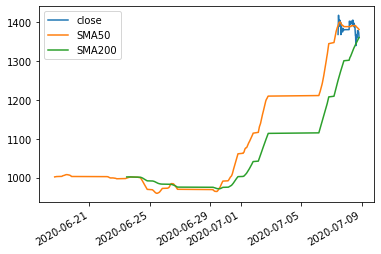

In [51]:
ts_df = pd.DataFrame(timeSeries)
ts_df.drop("volume").applymap(float).T.plot()

In [34]:
for k,v in stockSMA50['Technical Analysis: SMA'].items()
timeSeries[k] = v

{'2020-07-08 20:00:00': ['1361.0300', '16063'],
 '2020-07-08 19:45:00': ['1368.2800', '8878'],
 '2020-07-08 19:30:00': ['1373.0000', '5321'],
 '2020-07-08 19:15:00': ['1375.0000', '4960'],
 '2020-07-08 19:00:00': ['1377.0200', '4426'],
 '2020-07-08 18:45:00': ['1376.9900', '6387'],
 '2020-07-08 18:30:00': ['1376.8500', '5577'],
 '2020-07-08 18:15:00': ['1376.9900', '6979'],
 '2020-07-08 18:00:00': ['1375.0800', '12662'],
 '2020-07-08 17:45:00': ['1378.8800', '27852'],
 '2020-07-08 17:30:00': ['1372.0000', '9143'],
 '2020-07-08 17:15:00': ['1369.4000', '6767'],
 '2020-07-08 17:00:00': ['1368.9400', '21971'],
 '2020-07-08 16:45:00': ['1368.0000', '20981'],
 '2020-07-08 16:30:00': ['1360.0600', '20170'],
 '2020-07-08 16:15:00': ['1358.8900', '81619'],
 '2020-07-08 16:00:00': ['1365.8054', '878976'],
 '2020-07-08 15:45:00': ['1355.4000', '564873'],
 '2020-07-08 15:30:00': ['1359.3900', '918382'],
 '2020-07-08 15:15:00': ['1351.9905', '1088619'],
 '2020-07-08 15:00:00': ['1339.9614', '19642